In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

### Comparison of contactProbability

In [2]:
bench_cp = pd.read_csv('test/fithic_outputs/FitHiC.fithic_pass1.res40000.txt', sep='\t')

In [3]:
bench_cp.head()

,avgGenomicDist,contactProbability,standardError,noOfLocusPairs,totalOfContactCounts
0,80000,0.000016,0.0,6230,657712
1,120000,0.000013,0.0,6229,517185
2,160000,0.000011,0.0,6228,431841
3,200000,0.000009,0.0,6227,371687
4,240000,0.000008,0.0,6226,323129


In [4]:
mynew_cp = pd.read_csv('test/pfithic_output/OMEGA_FitHiC.pass1_fithic.tsv', sep='\t')

In [5]:
mynew_cp.head()

,avgGenomicDist,contactProbability,standardError,noOfLocusPairs,totalOfContactCounts
0,80000,0.000016,2.608700e-09,6230,657712
1,120000,0.000013,2.052000e-09,6229,517185
2,160000,0.000011,1.713900e-09,6228,431841
3,200000,0.000009,1.475700e-09,6227,371687
4,240000,0.000008,1.283300e-09,6226,323129


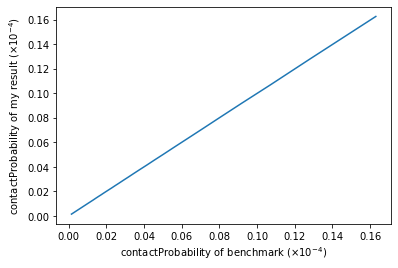

In [6]:
plt.plot(bench_cp['contactProbability'].values * 1e4, mynew_cp['contactProbability'].values * 1e4)
plt.xlabel(r'contactProbability of benchmark ($\times 10^{-4}$)')
plt.ylabel(r'contactProbability of my result ($\times 10^{-4}$)');

### Comparision of contactSignificance

In [7]:
bench_sig = pd.read_csv('test/fithic_outputs/FitHiC.spline_pass1.res40000.significances.txt.gz', sep='\t')

In [8]:
bench_sig.head()

,chr1,fragmentMid1,chr2,fragmentMid2,contactCount,p-value,q-value,bias1,bias2
0,chr1,100020000,chr1,100100000,201,7.783228e-17,7.525830e-15,1.0,1.0
1,chr1,100020000,chr1,100140000,232,1.845237e-40,1.027228e-37,1.0,1.0
2,chr1,100020000,chr1,100180000,138,2.165469e-13,1.486052e-11,1.0,1.0
3,chr1,100020000,chr1,100220000,87,4.396614e-04,6.872577e-03,1.0,1.0
4,chr1,100020000,chr1,100260000,25,9.999886e-01,1.000000e+00,1.0,1.0


In [9]:
mynew_sig = pd.read_csv('test/pfithic_output/OMEGA_FitHiC.pass1_spline.significant.gz', sep='\t')

In [10]:
mynew_sig = mynew_sig[mynew_sig.contactType == 'intraInRange']

In [11]:
mynew_sig.head()

,chr1,locus1,chr2,locus2,contactCount,distance,contactType,p_vals,q_vals
0,chr1,100020000,chr1,100100000,201,80000,intraInRange,7.783232e-17,7.525832e-15
1,chr1,100020000,chr1,100140000,232,120000,intraInRange,1.845234e-40,1.027226e-37
2,chr1,100020000,chr1,100180000,138,160000,intraInRange,2.165468e-13,1.486052e-11
3,chr1,100020000,chr1,100220000,87,200000,intraInRange,4.396615e-04,6.872567e-03
4,chr1,100020000,chr1,100260000,25,240000,intraInRange,9.999886e-01,1.000000e+00


Text(0, 0.5, 'q-values of my result')

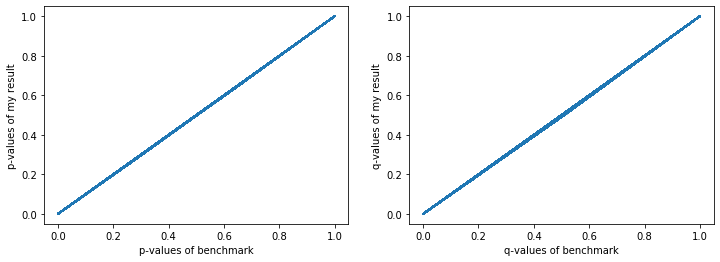

In [12]:
fig = plt.figure(figsize=[12,4])
plt.subplot(121)
plt.plot(bench_sig['p-value'].values, mynew_sig['p_vals'].values)
plt.xlabel(r'p-values of benchmark')
plt.ylabel(r'p-values of my result')
plt.subplot(122)
plt.plot(bench_sig['q-value'].values, mynew_sig['q_vals'].values)
plt.xlabel(r'q-values of benchmark')
plt.ylabel(r'q-values of my result')